In [1]:
import numpy as np
import pandas as pd
DATA = pd.read_csv("kmeans.csv", delimiter=',', index_col='Object')

In [2]:
DATA

,X,Y,Cluster
Object,,,
1,15,16,0
2,7,11,1
3,15,4,2
4,2,3,0
5,16,13,2
6,17,10,0
7,12,16,1
8,7,5,2
9,1,6,2


In [3]:
#удаление столбца Cluster из набора данных
coords = DATA.drop('Cluster', axis=1)

In [4]:
#подключение KMeans из библиотеки sklearn
from sklearn.cluster import KMeans

In [5]:
#координаты центроидов
centroid_coords_df = email_text_df = pd.DataFrame({'X': [4.8, 5.25, 2], 'Y': [5, 6.375, 1.5], 'Color': [1,1,1]})
centroid = np.array([[13.5, 8.75], [11.67, 10.33], [9.8, 9.0]])
centroid_coords_df

,X,Y,Color
0,4.80,5.000,1
1,5.25,6.375,1
2,2.00,1.500,1


In [6]:
#инициализация модели
kmeans = KMeans(n_clusters=3, init=centroid, max_iter=100, n_init=1)

In [7]:
#обучение модели на данных из coords
model = kmeans.fit(coords)

In [8]:
#вывод назначенных кластеров
new_clusters = model.labels_.tolist()

In [9]:
# DATA['Cluster'] = [num + 1 for num in new_clusters]
DATA['Cluster'] = new_clusters

In [10]:
DATA

,X,Y,Cluster
Object,,,
1,15,16,1
2,7,11,2
3,15,4,0
4,2,3,2
5,16,13,1
6,17,10,0
7,12,16,1
8,7,5,2
9,1,6,2


In [11]:
import seaborn as sns

In [12]:
coords_vis = coords.append(centroid_coords_df, ignore_index=True, sort=False).fillna(0)
coords_vis

,X,Y,Color
0,15.00,16.000,0.0
1,7.00,11.000,0.0
2,15.00,4.000,0.0
3,2.00,3.000,0.0
4,16.00,13.000,0.0
5,17.00,10.000,0.0
6,12.00,16.000,0.0
7,7.00,5.000,0.0
8,1.00,6.000,0.0
9,7.00,4.000,0.0


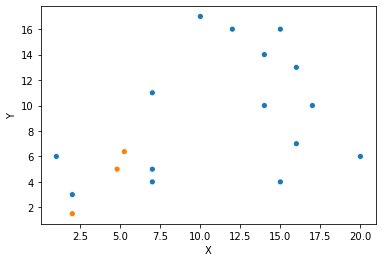

In [13]:
sns.scatterplot(x="X", y="Y", data=coords_vis, hue="Color", legend=False)

In [14]:
#обучение модели и расчет расстояний до центроидов
alldistances = kmeans.fit_transform(coords)

In [15]:
#вывод расстояний от данных до всех центроидов
alldistances

array([[ 8.71320836,  1.78885438, 14.42497834],
       [10.06578363,  7.65506368,  5.64623769],
       [ 3.67695526, 11.3137085 , 10.3576059 ],
       [15.05722418, 16.69730517,  3.95979797],
       [ 5.61426754,  3.40587727, 13.31465358],
       [ 2.66833281,  6.32455532, 12.90271289],
       [ 9.66022774,  1.61245155, 12.48519123],
       [ 9.70154627, 12.04159458,  2.34093998],
       [15.46350542, 15.44020725,  3.80525952],
       [ 9.9959992 , 12.8996124 ,  2.84253408],
       [ 0.56568542,  8.60232527, 11.26410227],
       [ 3.86264158, 11.32254388, 15.20131573],
       [ 7.02281995,  1.34164079, 12.3239604 ],
       [11.53776408,  3.84707681, 12.34827923],
       [ 3.5383612 ,  5.23450093, 10.1133575 ]])

In [16]:
DATA['Cluster0'] = [obj[0] for obj in alldistances]
DATA['Cluster1'] = [obj[1] for obj in alldistances]
DATA['Cluster2'] = [obj[2] for obj in alldistances]

In [17]:
DATA

,X,Y,Cluster,Cluster0,Cluster1,Cluster2
Object,,,,,,
1,15,16,1,8.713208,1.788854,14.424978
2,7,11,2,10.065784,7.655064,5.646238
3,15,4,0,3.676955,11.313708,10.357606
4,2,3,2,15.057224,16.697305,3.959798
5,16,13,1,5.614268,3.405877,13.314654
6,17,10,0,2.668333,6.324555,12.902713
7,12,16,1,9.660228,1.612452,12.485191
8,7,5,2,9.701546,12.041595,2.340940
9,1,6,2,15.463505,15.440207,3.805260


In [20]:
new_data = DATA.loc[DATA['Cluster'] == 0]
new_data

,X,Y,Cluster,Cluster0,Cluster1,Cluster2
Object,,,,,,
3,15,4,0,3.676955,11.313708,10.357606
6,17,10,0,2.668333,6.324555,12.902713
11,16,7,0,0.565685,8.602325,11.264102
12,20,6,0,3.862642,11.322544,15.201316
15,14,10,0,3.538361,5.234501,10.113358


In [21]:
new_data.Cluster0

[3.6769552621700523,
 2.668332812825278,
 0.565685424949232,
 3.8626415831655954,
 3.5383612025908318]

In [24]:
round(new_data.Cluster0.mean(),3)

2.862